In [43]:
#Implement feed forward neural network with cifar10 dataset with 3 hidden layer
#mnist.load_data()

Import libraries

In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

Load Dataset

In [45]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Normalise the data

In [46]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [47]:
#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Build Model

In [48]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])    

In [49]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training

In [50]:
history=model.fit(
    x_train,y_train,
    epochs=22,
    batch_size=64,
    validation_split=0.2
)    

Epoch 1/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2583 - loss: 2.0437 - val_accuracy: 0.3775 - val_loss: 1.7620
Epoch 2/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3815 - loss: 1.7272 - val_accuracy: 0.4036 - val_loss: 1.6782
Epoch 3/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4141 - loss: 1.6332 - val_accuracy: 0.4275 - val_loss: 1.6032
Epoch 4/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4418 - loss: 1.5459 - val_accuracy: 0.4255 - val_loss: 1.6023
Epoch 5/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4499 - loss: 1.5299 - val_accuracy: 0.4428 - val_loss: 1.5660
Epoch 6/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4725 - loss: 1.4730 - val_accuracy: 0.4615 - val_loss: 1.5262
Epoch 7/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4890 - loss: 1.4348 - val_accuracy: 0.4337 - val_loss: 1.5727
Epoch 8/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4941 - loss: 1.4156 - val_accu

Evaluate the model

In [51]:
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.5002 - loss: 1.4861
Test Accuracy :0.5002


Graphs

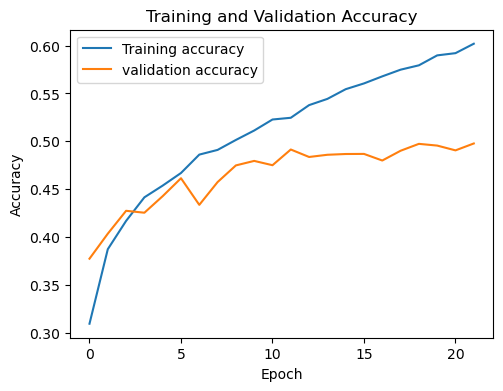

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

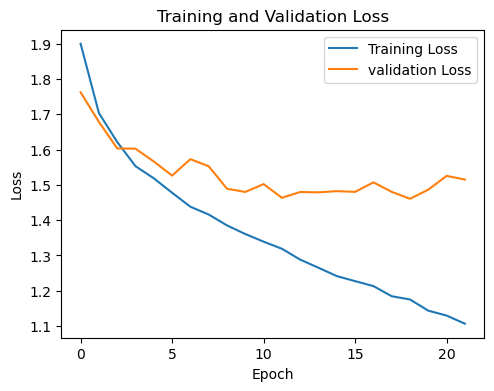

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()